In [83]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn

from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 

from sklearn.datasets import load_boston
boston = load_boston()

bos = pd.DataFrame(boston.data)

In [84]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [85]:
data= pd.DataFrame(boston.data,columns=boston.feature_names)

In [86]:
data['MDEV']=boston.target

In [87]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [88]:
data.to_csv('boston.csv',index=False)

In [89]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [91]:
features=1

In [92]:
y = data['MDEV']
x1 = data[ 'CRIM']

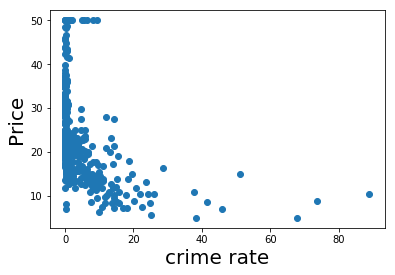

In [93]:

plt.scatter(x1,y)
plt.xlabel('crime rate',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

CRIM


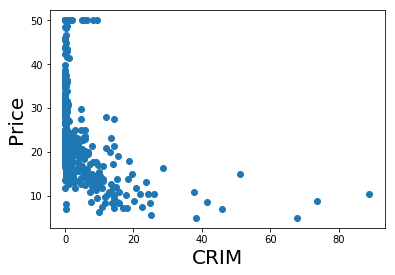

ZN


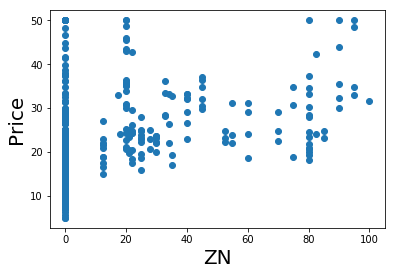

INDUS


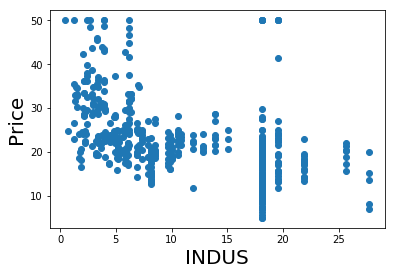

CHAS


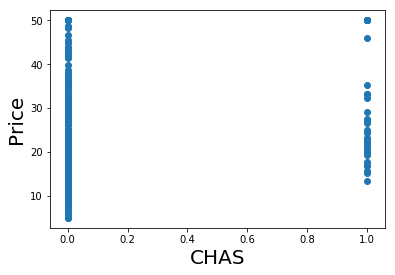

NOX


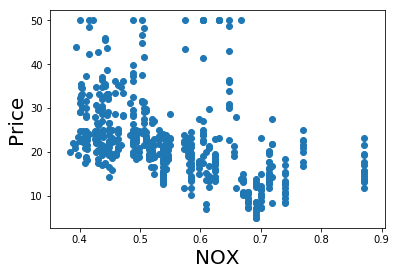

RM


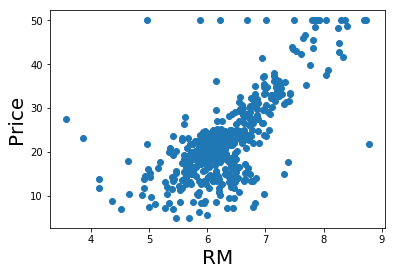

AGE


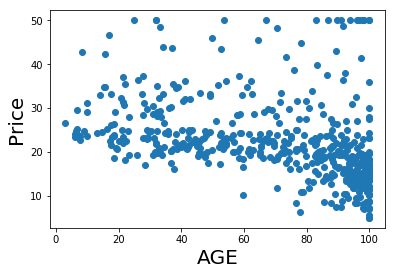

DIS


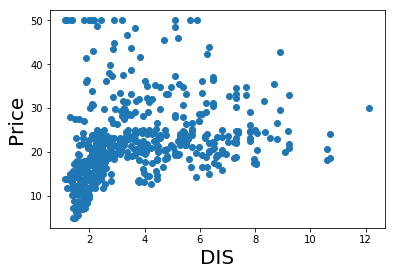

RAD


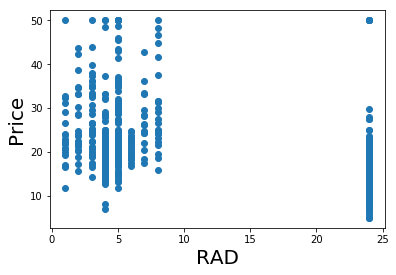

TAX


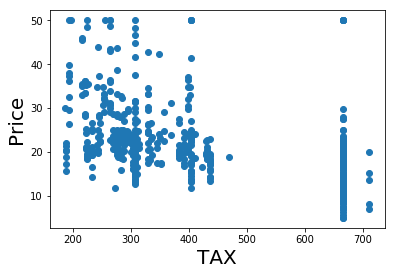

PTRATIO


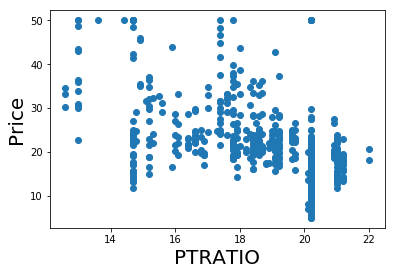

B


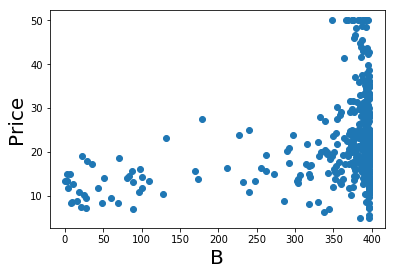

LSTAT


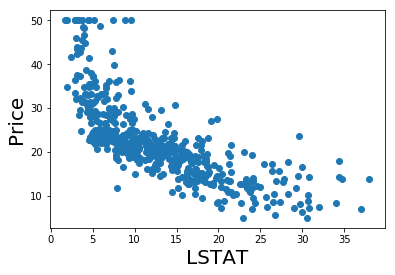

MDEV


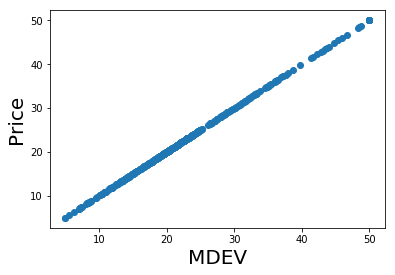

In [94]:
for i in data[1:]:
    print(i)
    plt.scatter(data[i],data['MDEV'])
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Price',fontsize=20)
   
    plt.show()

In [95]:
y = data['MDEV']
x1 = data[ 'ZN']

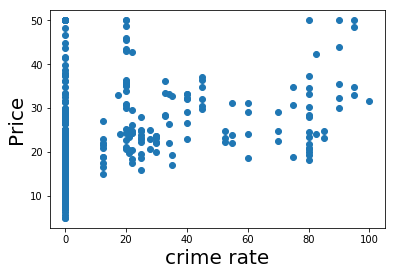

In [96]:
plt.scatter(x1,y)
plt.xlabel('crime rate',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

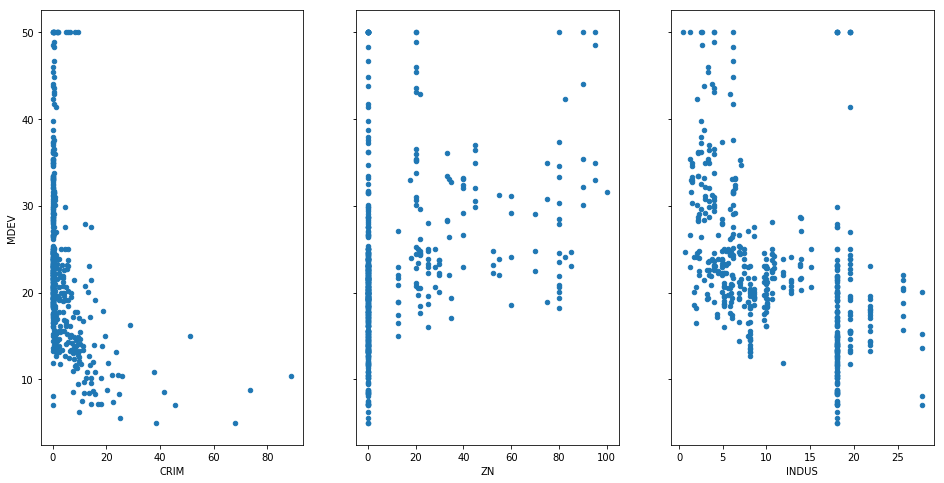

In [97]:
#above and this plot are same but diffrnt way to plot
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='CRIM', y='MDEV', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='ZN', y='MDEV', ax=axs[1])
data.plot(kind='scatter', x='INDUS', y='MDEV', ax=axs[2])

In [98]:
data.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [99]:
o=data.iloc[:,:-1].values

In [100]:
print(o)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [101]:
data.shape

(506, 14)

In [102]:
y = data['MDEV']
X =data.drop(columns = ['MDEV'])

In [103]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled


vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif["Features"] = X.columns

In [104]:
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


we can see that RAD and TAX highly corelated , so when we fit regression model we will remove one of these 

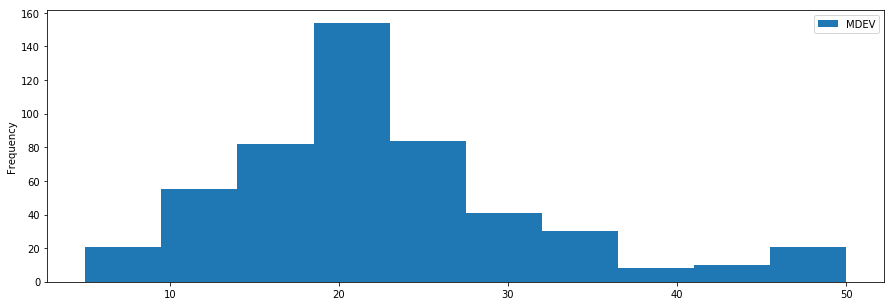

In [105]:
data[['MDEV']].plot(
    kind='hist',
    figsize=(15, 5),
    bins=10
);

its right skewed value suggest a log transform will be appropriate

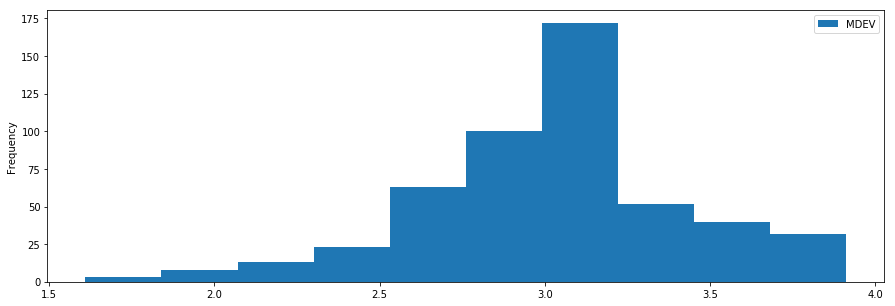

In [106]:
np.log(data[['MDEV']]).plot(
    kind='hist',
    figsize=(15, 5),
    bins=10
);

# MODEL

remove rad from feature

In [112]:
features = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT'
]

In [149]:
reduce_feature = [f for f in features if f!='RAD']

In [150]:
reduce_feature

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [151]:
X_train,X_Test,y_train,y_test=train_test_split(
    data[reduce_feature].values,
    np.log(data['MDEV'].values),
    test_size=0.2
)

In [152]:
# add constant
X_trainc = sm.add_constant(X_train)

# initialize model
reg = sm.OLS(y_train, X_trainc)
# fit model
fit = reg.fit()

# model summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     113.5
Date:                Thu, 21 Jan 2021   Prob (F-statistic):          3.01e-119
Time:                        14:46:05   Log-Likelihood:                 97.448
No. Observations:                 404   AIC:                            -168.9
Df Residuals:                     391   BIC:                            -116.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4868      0.229     15.200      0.000       3.036       3.938
x1            -0.0068      0.002     -4.206      0.000      -0.010      -0.004
x2             0.0010      0.001      1.606      0.109      -0.000       0.002
x3            -0.0003      0.003     -0.110      0.913      -0.006       0.005
x4             0.1658      0.039      4.240      0.000       0.089       0.243
x5            -0.6286      0.175     -3.598      0.000      -0.972      -0.285
x6             0.1299      0.020      6.392      0.000       0.090       0.170
x7            -0.0004      0.001     -0.607      0.544      -0.002       0.001
x8            -0.0473      0.009     -5.389      0.000      -0.065      -0.030
x9         -7.611e-05      0.000     -0.711      0.478      -0.000       0.000
x10           -0.0283      0.006     -4.836      0.000      -0.040      -0.017
x11            0.0005      0.000      3.881      0.000       0.000       0.001
x12           -0.0255      0.002    -10.712      0.000      -0.030      -0.021
==============================================================================
Omnibus:                       78.934   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              392.557
Skew:                           0.725   Prob(JB):                     5.72e-86
Kurtosis:                       7.606   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [153]:
print(features[1],features[2],features[3],features[6],features[8])

ZN INDUS CHAS AGE RAD


In [154]:
reduced_features = [f for f in features if f not in ['ZN', 'INDUS', 'AGE', 'RAD']]

In [155]:
X_train, X_test, y_train, y_test = train_test_split(
    data[reduced_features].values,
    np.log(data['MDEV'].values),
    test_size=0.2
)

# add constant
X_trainc = sm.add_constant(X_train)

# initialize model
reg = sm.OLS(y_train, X_trainc)

# fit model
fit = reg.fit()

# model summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     150.9
Date:                Thu, 21 Jan 2021   Prob (F-statistic):          8.09e-122
Time:                        14:46:06   Log-Likelihood:                 89.736
No. Observations:                 404   AIC:                            -159.5
Df Residuals:                     394   BIC:                            -119.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7011      0.223     16.586      0.000       3.262       4.140
x1            -0.0090      0.001     -6.497      0.000      -0.012      -0.006
x2             0.1331      0.041      3.272      0.001       0.053       0.213
x3            -0.5939      0.163     -3.642      0.000      -0.914      -0.273
x4             0.1170      0.018      6.585      0.000       0.082       0.152
x5            -0.0358      0.007     -4.845      0.000      -0.050      -0.021
x6         -1.852e-05   9.73e-05     -0.190      0.849      -0.000       0.000
x7            -0.0364      0.005     -6.684      0.000      -0.047      -0.026
x8             0.0003      0.000      2.575      0.010    7.51e-05       0.001
x9            -0.0274      0.002    -12.882      0.000      -0.032      -0.023
==============================================================================
Omnibus:                       57.210   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.449
Skew:                           0.509   Prob(JB):                     2.50e-55
Kurtosis:                       6.728   Cond. No.                     1.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [156]:
print(reduced_features[5])

TAX


In [157]:
reduced_features= [f for f in reduced_features if f != 'TAX']

In [158]:
X_train, X_test, y_train, y_test = train_test_split(
    data[reduced_features].values,
    np.log(data['MDEV'].values),
    test_size=0.2
)

# add constant
X_trainc = sm.add_constant(X_train)

# initialize model
reg = sm.OLS(y_train, X_trainc)

# fit model
fit = reg.fit()

# model summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     156.8
Date:                Thu, 21 Jan 2021   Prob (F-statistic):          1.47e-117
Time:                        14:46:06   Log-Likelihood:                 83.754
No. Observations:                 404   AIC:                            -149.5
Df Residuals:                     395   BIC:                            -113.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8373      0.219     17.518      0.000       3.407       4.268
x1            -0.0071      0.001     -5.349      0.000      -0.010      -0.004
x2             0.1187      0.042      2.857      0.005       0.037       0.200
x3            -0.6475      0.153     -4.219      0.000      -0.949      -0.346
x4             0.0992      0.018      5.519      0.000       0.064       0.135
x5            -0.0432      0.008     -5.676      0.000      -0.058      -0.028
x6            -0.0329      0.005     -6.249      0.000      -0.043      -0.023
x7             0.0003      0.000      2.459      0.014    6.22e-05       0.001
x8            -0.0306      0.002    -13.531      0.000      -0.035      -0.026
==============================================================================
Omnibus:                       54.812   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.022
Skew:                           0.507   Prob(JB):                     3.73e-49
Kurtosis:                       6.496   Cond. No.                     8.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [160]:
pd.DataFrame(
        data=dict(zip(
        ['intercept']+data[reduced_features].columns.tolist(),
        [variance_inflation_factor(X_trainc, i) for i in range(X_trainc.shape[1])]
    )),
    index=['vif']
)

,intercept,CRIM,CHAS,NOX,RM,DIS,PTRATIO,B,LSTAT
vif,490.028207,1.435516,1.062602,3.140955,1.617346,2.535478,1.230578,1.367887,2.61223


In [ ]:
no vif greater than 5 soo we will kepp all of them

In [161]:
X_testc = sm.add_constant(X_test)

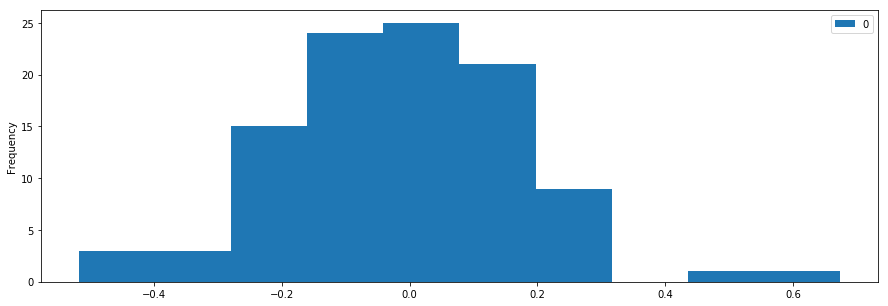

In [162]:
pd.DataFrame(y_test -  fit.predict(X_testc)).plot(
    kind='hist',
    figsize=(15, 5),
    bins=10
);

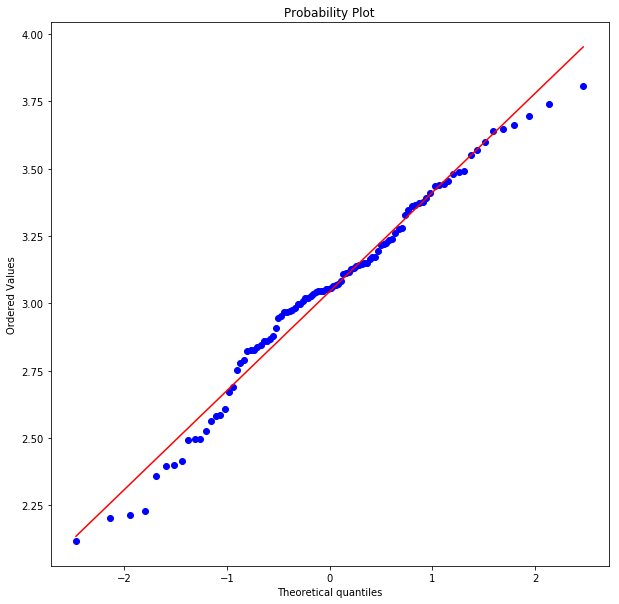

In [163]:
fig, ax = plt.subplots(figsize=(10, 10))

stats.probplot(
    x=fit.predict(X_testc), 
    dist="norm", 
    plot=ax
);